In [ ]:
from google.colab import drive
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt


drive.mount('/content/drive', force_remount=True)
data_dir = '/content/drive/My Drive/project lab/'
#data_hle = pd.read_csv(data_dir + 'uhle_epochs30_batchsize64_cluster6.csv', index_col = 0)  # Unnamed: 0 제거
#data_lat = pd.read_csv(data_dir + 'ulatent_epochs30_batchsize64_cluster6.csv', index_col = 0)  # Unnamed: 0 제거
data_pred = pd.read_csv(data_dir + 'upred_epochs30_batchsize64_cluster7.csv', index_col = 0)  # Unnamed: 0 제거
CSVDATA = pd.read_csv(data_dir + 'clustering_data_1901_2004.csv', index_col = 0)
columns = ['year', 'month', 'region', 'sex', 'age', 'income', 'Home', 'Education', 'Transporation', 'ETC', 
           'Mart', 'Insurance', 'Service', 'Grocery', 'Travel', 'Fun', 'Restaurant', 'Hospital', 
           'Clothes', 'Car', 'E-commerce', 'Retail','EXCEPTIONS', 'Sum %']
           
CSVDATA = CSVDATA[['year', 'month', '가맹점소재지2', '성별', '연령대별', '연평균소득추정', '가구 및 전자 제품', '교육', '교통', '기타',
       '대형 판매', '보험', '서비스', '식료품', '여행 및 숙박', '오락 및 문화', '음식점', '의료',
       '의류 및 잡화', '자동차', '전자상거래', '종합소매', '예외처리', '합계%']]
CSVDATA.columns = columns

pred = data_pred
pred = pred['0'].values
CSVDATA['pred'] = pred        

CSVDATA = CSVDATA.sample(n=10000, random_state=2021)

Mounted at /content/drive


In [ ]:
df = CSVDATA.copy()
df.head()

,year,month,region,sex,age,income,Home,Education,Transporation,ETC,Mart,Insurance,Service,Grocery,Travel,Fun,Restaurant,Hospital,Clothes,Car,E-commerce,Retail,EXCEPTIONS,Sum %,pred
117325,2019,7,화순군,여성,30대,B3,0.000000,17.370950,0.000000,0.263246,0.785364,0.000000,2.115391,2.415105,2.830737,4.852969,21.466161,14.188677,2.573420,12.216559,0.000000,18.921421,0.0,100.0,5
92037,2019,6,안성시,남성,60대 이상,B11,0.000000,0.000000,0.000000,0.000000,1.168744,0.000000,0.000000,1.728933,0.390436,65.469290,17.421551,0.432976,0.204833,5.645022,0.000000,7.538214,0.0,100.0,0
247382,2020,3,용산구,남성,50대,B4,2.721738,0.020330,0.009632,0.080645,0.462610,5.863965,29.658817,0.286212,0.288350,0.270711,2.083963,0.796951,0.033835,0.159459,53.481204,3.781578,0.0,100.0,1
252813,2020,4,강릉시,여성,20대 이하,B4,0.000000,0.960890,0.000000,0.000000,6.241900,0.000000,1.107160,5.769770,7.350072,2.014533,51.194346,2.304606,2.211941,2.202701,0.000000,18.642080,0.0,100.0,0
85150,2019,6,구리시,여성,30대,B4,0.637068,18.981087,0.000000,1.229662,13.745250,0.000000,3.453977,4.606953,2.609157,5.249358,19.471903,14.112607,2.419329,3.940824,0.000000,9.542825,0.0,100.0,5


## 2019 01 ~ 2020 04 클러스터 비율 변화를 Glide path graph로 나타내기
####클러스터 k개 기준(K=7로 입력)


188 215 224 212 259 241 256 267 250 248 227 215 213 170 191 205 
50 49 71 60 73 71 82 76 67 57 76 45 64 55 57 59 
91 68 91 90 87 97 72 85 80 106 77 88 90 74 69 73 
10 10 5 4 10 12 9 13 12 8 12 8 8 9 6 9 
16 13 17 10 16 17 13 23 27 23 19 11 15 18 9 23 
98 73 82 69 90 80 81 61 87 80 66 67 82 70 72 57 
154 161 149 133 143 147 141 125 158 153 142 147 176 140 190 180 


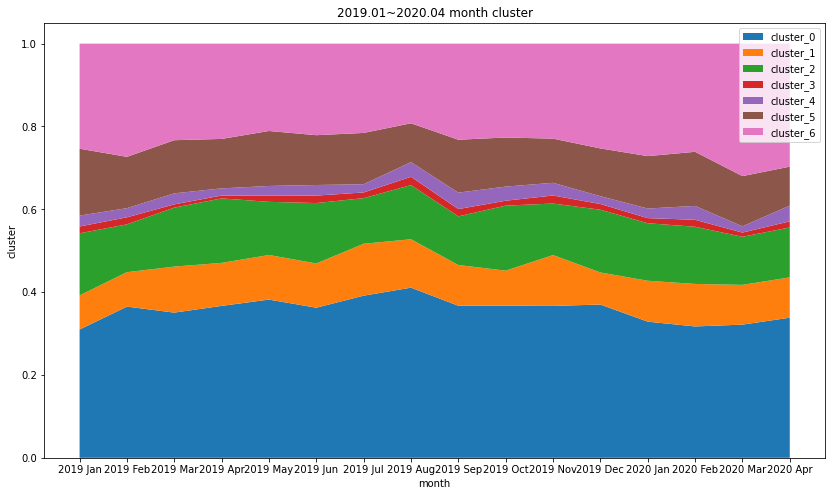

In [ ]:
df = CSVDATA.copy()
df.head()

k=7 # 클러스터수를 입력

arr_20 = [[0 for j in range(16)] for i in range (0,k)] # 총 16개월 (19년 12개월 20년 4개월)
sum = [0 for i in range(16)]

grouped = df.groupby(['year','month','pred'])

# key[0] = 년도, key[1] = 월, key[2] = 클러스터
for key, group in grouped:
  if key[0]== 2019:
    arr_20[key[2]][key[1]-1] = len(group)
  elif key[0] == 2020:
    arr_20[key[2]][key[1]+11] = len(group)

# 출력하여 보여줌
for i in arr_20:        
    for j in i:    
        print(j, end=' ')
    print()

# 그래프 x좌표

x=["2019 Jan","2019 Feb","2019 Mar","2019 Apr","2019 May","2019 Jun",
   "2019 Jul","2019 Aug","2019 Sep","2019 Oct","2019 Nov","2019 Dec","2020 Jan","2020 Feb","2020 Mar","2020 Apr"]

# 그래프 y 좌표 계산
#월별 클러스터 수의 합 
for i in range(0,16):
  for j in range(0,k):    
    sum[i]+=arr_20[j][i]
 
# 각 클러스터 비율을 arr_20에 입력
for i in range(0,16):
  for j in range(0,k):
    arr_20[j][i]=arr_20[j][i]/sum[i]

 
labels = ["cluster_{0}".format(i) for i in range(0,k)]
y = [arr_20[i] for i in range(0,k)]

#y=[arr_20[0],arr_20[1],arr_20[2],arr_20[4],arr_20[5],arr_20[7]]
plt.figure(figsize=(14,8))

plt.stackplot(x, y,labels=labels)

plt.xlabel('month')
plt.ylabel('cluster')
plt.title('2019.01~2020.04 month cluster') 
plt.legend()
plt.show()    


## 2019 01 ~ 2020 04 클러스터 비율 변화를 stacked plot graph로 나타내기
####클러스터 k개 기준(K=7로 입력)




188 215 224 212 259 241 256 267 250 248 227 215 213 170 191 205 
50 49 71 60 73 71 82 76 67 57 76 45 64 55 57 59 
91 68 91 90 87 97 72 85 80 106 77 88 90 74 69 73 
10 10 5 4 10 12 9 13 12 8 12 8 8 9 6 9 
16 13 17 10 16 17 13 23 27 23 19 11 15 18 9 23 
98 73 82 69 90 80 81 61 87 80 66 67 82 70 72 57 
154 161 149 133 143 147 141 125 158 153 142 147 176 140 190 180 


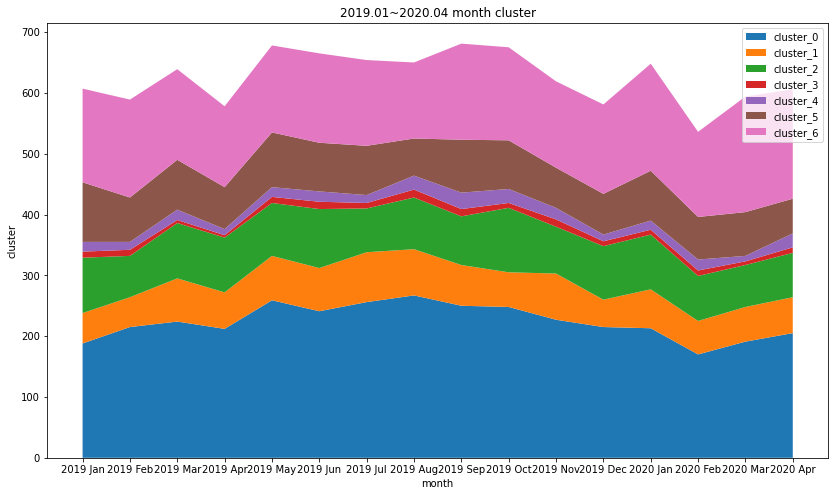

In [ ]:
df = CSVDATA.copy()
df.head()

k=7 # 클러스터수를 입력

arr_20 = [[0 for j in range(16)] for i in range (0,k)] # 총 16개월 (19년 12개월 20년 4개월)

grouped = df.groupby(['year','month','pred'])

# key[0] = 년도, key[1] = 월, key[2] = 클러스터
for key, group in grouped:
  if key[0]== 2019:
    arr_20[key[2]][key[1]-1] = len(group)
  elif key[0] == 2020:
    arr_20[key[2]][key[1]+11] = len(group)

# 출력하여 보여줌
for i in arr_20:        
    for j in i:    
        print(j, end=' ')
    print()

# 그래프 x좌표

x=["2019 Jan","2019 Feb","2019 Mar","2019 Apr","2019 May","2019 Jun",
   "2019 Jul","2019 Aug","2019 Sep","2019 Oct","2019 Nov","2019 Dec","2020 Jan","2020 Feb","2020 Mar","2020 Apr"]

# 그래프 y 좌표 계산
#월별 클러스터 수의 합 

 
# 각 클러스터 비율을 arr_20에 입력


 
labels = ["cluster_{0}".format(i) for i in range(0,k)]
y = [arr_20[i] for i in range(0,k)]

#y=[arr_20[0],arr_20[1],arr_20[2],arr_20[4],arr_20[5],arr_20[7]]
plt.figure(figsize=(14,8))

plt.stackplot(x, y,labels=labels)
plt.xlabel('month')


plt.ylabel('cluster')
plt.title('2019.01~2020.04 month cluster') 
plt.legend()
plt.show()    


###성별,연령별로 Data 나누기 

In [ ]:
df_1 = CSVDATA.copy()
df_1.head()


df_male= df_1[df_1['sex']=='남성']
df_male_2030 = df_male[(df_male['age']=='20대 이하') | (df_male['age']=='30대')]
df_male_4050 = df_male[(df_male['age']=='40대') | (df_male['age']=='50대')]
df_male_60 = df_male[df_male['age']=='60대 이상']

df_female = df_1[df_1['sex']=='여성']
df_female_2030 = df_female[(df_female['age']=='20대 이하') | (df_female['age']=='30대')]
df_female_4050 = df_female[(df_female['age']=='40대') | (df_female['age']=='50대')]
df_female_60 = df_female[df_female['age']=='60대 이상']


61 67 66 63 86 74 89 87 77 86 90 63 77 60 64 77 
11 9 14 10 13 13 16 10 8 10 12 5 7 6 9 12 
15 11 14 9 11 13 14 7 13 11 12 13 8 13 8 11 
4 3 1 1 2 6 3 4 5 5 4 4 3 3 3 2 
2 1 2 2 2 3 0 6 3 7 2 1 1 4 1 4 
8 7 9 9 9 8 6 4 11 7 5 3 7 9 7 8 
7 6 8 7 9 6 5 5 9 9 8 6 9 5 10 10 


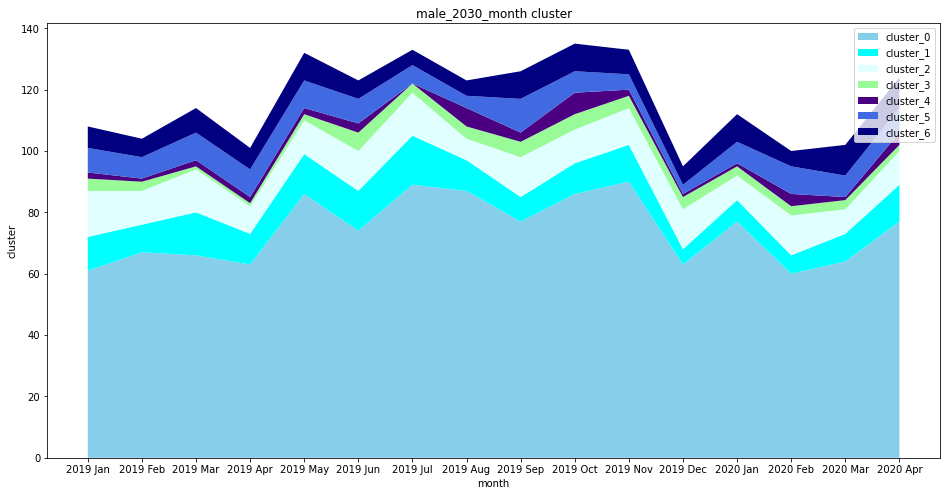

In [ ]:
#월에 해당 클러스터가 0개 일것을 감안하여 생성



#####################################################################
grouped = df_male_2030.groupby(['year','month','pred'])

arr_20 = [[0 for j in range(16)] for i in range (k)]


for key, group in grouped:
  if key[0]== 2019:
    arr_20[key[2]][key[1]-1] = len(group)
  elif key[0] == 2020:
    arr_20[key[2]][key[1]+11] = len(group)
for i in arr_20:        # a에서 안쪽 리스트를 꺼냄
    for j in i:    # 안쪽 리스트에서 요소를 하나씩 꺼냄
        print(j, end=' ')
    print()
  
x=["2019 Jan","2019 Feb","2019 Mar","2019 Apr","2019 May","2019 Jun",
   "2019 Jul","2019 Aug","2019 Sep","2019 Oct","2019 Nov","2019 Dec","2020 Jan","2020 Feb","2020 Mar","2020 Apr"]

#y = [[100, 140, 110, 150, 130, 160], [330, 450, 350, 450, 380, 480], [50, 50, 50, 50, 50, 50]]
#월별 클러스터 수의 합 


labels = ["cluster_{0}".format(i) for i in range(0,k)]
y = [arr_20[i] for i in range(0,k)]

plt.figure(figsize=(16,8))

plt.stackplot(x, y,colors=['skyblue','aqua','lightcyan','palegreen','indigo','royalblue','navy'],labels=labels)
#plt.stackplot(x, y,colors=['coral','peachpuff','salmon','navajowhite','lightyellow','brown','coral'],labels=labels) #female
plt.xlabel('month')


plt.ylabel('cluster')
plt.title('male_2030_month cluster')
plt.legend()
 


plt.show()    

42 64 62 71 76 78 72 74 85 60 61 74 76 50 58 69 
11 11 14 13 13 9 19 14 13 14 21 12 16 13 20 11 
33 24 31 31 27 28 24 27 30 36 29 20 30 26 30 20 
1 4 1 1 3 0 1 3 4 0 2 1 1 1 1 1 
3 5 5 2 4 2 2 2 2 6 2 1 3 2 3 5 
17 13 17 10 15 11 9 8 16 16 15 11 11 9 11 2 
42 38 46 40 41 34 44 25 48 33 40 38 62 43 57 60 


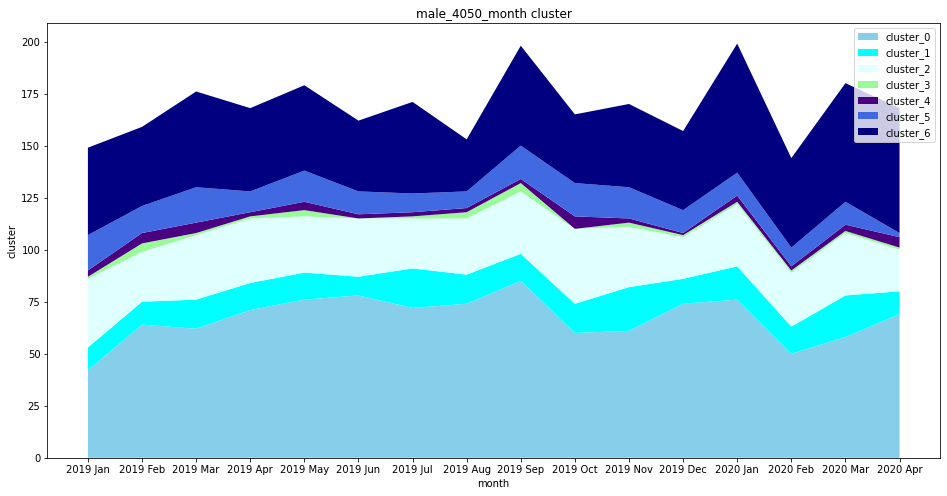

In [ ]:
#월에 해당 클러스터가 0개 일것을 감안하여 생성



#####################################################################
grouped = df_male_4050.groupby(['year','month','pred'])

arr_20 = [[0 for j in range(16)] for i in range (k)]


for key, group in grouped:
  if key[0]== 2019:
    arr_20[key[2]][key[1]-1] = len(group)
  elif key[0] == 2020:
    arr_20[key[2]][key[1]+11] = len(group)
for i in arr_20:        # a에서 안쪽 리스트를 꺼냄
    for j in i:    # 안쪽 리스트에서 요소를 하나씩 꺼냄
        print(j, end=' ')
    print()
  
x=["2019 Jan","2019 Feb","2019 Mar","2019 Apr","2019 May","2019 Jun",
   "2019 Jul","2019 Aug","2019 Sep","2019 Oct","2019 Nov","2019 Dec","2020 Jan","2020 Feb","2020 Mar","2020 Apr"]

#y = [[100, 140, 110, 150, 130, 160], [330, 450, 350, 450, 380, 480], [50, 50, 50, 50, 50, 50]]
#월별 클러스터 수의 합 


labels = ["cluster_{0}".format(i) for i in range(0,k)]
y = [arr_20[i] for i in range(0,k)]

plt.figure(figsize=(16,8))

plt.stackplot(x, y,colors=['skyblue','aqua','lightcyan','palegreen','indigo','royalblue','navy'],labels=labels)
#plt.stackplot(x, y,colors=['coral','peachpuff','salmon','navajowhite','lightyellow'],labels=labels) #female
plt.xlabel('month')


plt.ylabel('cluster')
plt.title('male_4050_month cluster')
plt.legend()
 


plt.show()    

13 16 18 15 18 18 18 22 19 21 13 13 13 14 18 9 
6 3 12 10 8 10 6 13 7 2 7 6 12 7 5 5 
19 16 21 28 17 21 9 26 18 26 17 30 18 18 12 23 
0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 3 
4 2 3 1 0 2 2 2 3 0 2 1 5 4 2 3 
0 2 0 0 0 0 0 1 0 0 1 1 1 1 0 0 
34 47 34 27 29 33 25 37 30 37 33 34 39 33 52 41 


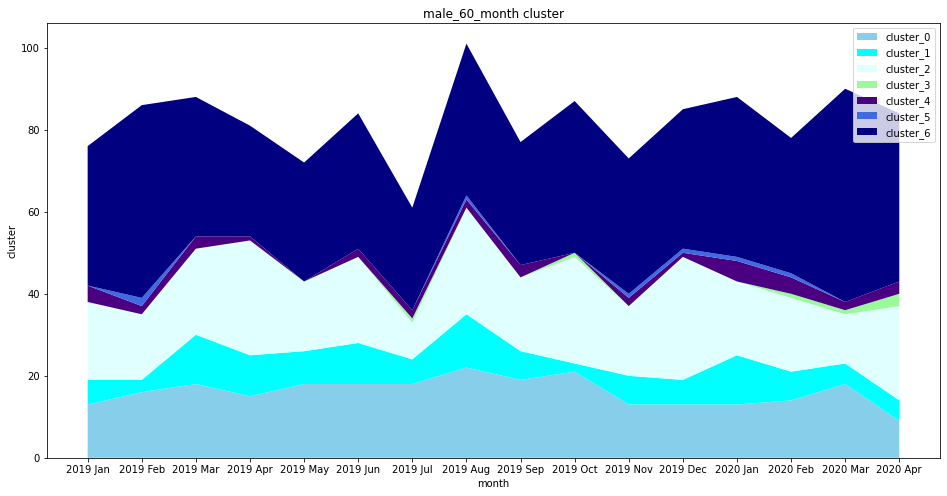

In [ ]:
#월에 해당 클러스터가 0개 일것을 감안하여 생성



#####################################################################
grouped = df_male_60.groupby(['year','month','pred'])

arr_20 = [[0 for j in range(16)] for i in range (k)]


for key, group in grouped:
  if key[0]== 2019:
    arr_20[key[2]][key[1]-1] = len(group)
  elif key[0] == 2020:
    arr_20[key[2]][key[1]+11] = len(group)
for i in arr_20:        # a에서 안쪽 리스트를 꺼냄
    for j in i:    # 안쪽 리스트에서 요소를 하나씩 꺼냄
        print(j, end=' ')
    print()
  
x=["2019 Jan","2019 Feb","2019 Mar","2019 Apr","2019 May","2019 Jun",
   "2019 Jul","2019 Aug","2019 Sep","2019 Oct","2019 Nov","2019 Dec","2020 Jan","2020 Feb","2020 Mar","2020 Apr"]

#y = [[100, 140, 110, 150, 130, 160], [330, 450, 350, 450, 380, 480], [50, 50, 50, 50, 50, 50]]
#월별 클러스터 수의 합 


labels = ["cluster_{0}".format(i) for i in range(0,k)]
y = [arr_20[i] for i in range(0,k)]

plt.figure(figsize=(16,8))

plt.stackplot(x, y,colors=['skyblue','aqua','lightcyan','palegreen','indigo','royalblue','navy'],labels=labels)
#plt.stackplot(x, y,colors=['coral','peachpuff','salmon','navajowhite','lightyellow'],labels=labels) #female
plt.xlabel('month')


plt.ylabel('cluster')
plt.title('male_60_month cluster')
plt.legend()
 


plt.show()    

40 35 41 27 44 35 45 42 44 39 30 30 19 23 19 31 
10 15 16 9 17 20 10 18 19 16 14 9 10 13 8 11 
11 10 8 9 11 14 9 8 7 9 4 7 8 7 3 6 
3 2 1 0 1 3 4 2 1 2 2 2 1 2 0 2 
3 2 2 2 1 5 0 4 6 6 4 3 3 4 1 3 
43 30 34 26 42 37 41 33 34 36 25 27 40 28 37 32 
3 2 2 0 3 2 2 3 1 2 4 4 7 1 2 2 


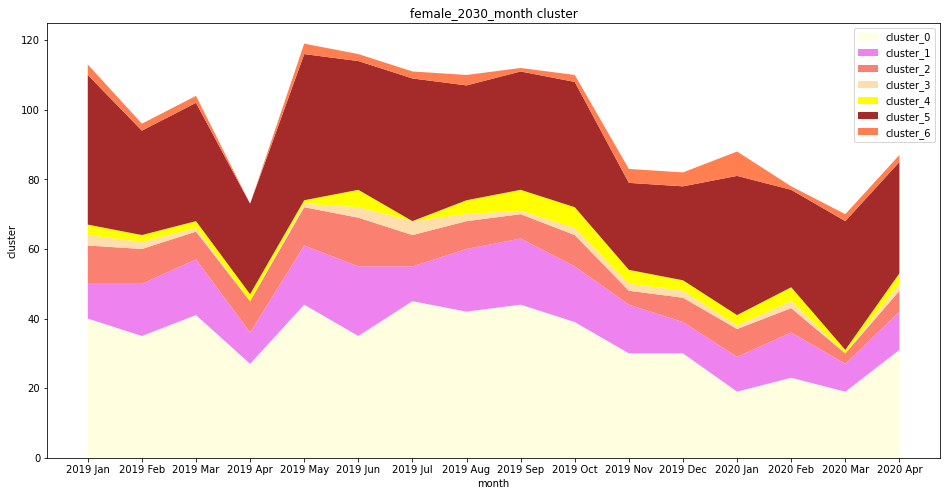

In [ ]:
#월에 해당 클러스터가 0개 일것을 감안하여 생성



#####################################################################
grouped = df_female_2030.groupby(['year','month','pred'])

arr_20 = [[0 for j in range(16)] for i in range (k)]


for key, group in grouped:
  if key[0]== 2019:
    arr_20[key[2]][key[1]-1] = len(group)
  elif key[0] == 2020:
    arr_20[key[2]][key[1]+11] = len(group)
for i in arr_20:        # a에서 안쪽 리스트를 꺼냄
    for j in i:    # 안쪽 리스트에서 요소를 하나씩 꺼냄
        print(j, end=' ')
    print()
  
x=["2019 Jan","2019 Feb","2019 Mar","2019 Apr","2019 May","2019 Jun",
   "2019 Jul","2019 Aug","2019 Sep","2019 Oct","2019 Nov","2019 Dec","2020 Jan","2020 Feb","2020 Mar","2020 Apr"]

#y = [[100, 140, 110, 150, 130, 160], [330, 450, 350, 450, 380, 480], [50, 50, 50, 50, 50, 50]]
#월별 클러스터 수의 합 


labels = ["cluster_{0}".format(i) for i in range(0,k)]
y = [arr_20[i] for i in range(0,k)]

plt.figure(figsize=(16,8))

#plt.stackplot(x, y,colors=['skyblue','aqua','lightcyan','palegreen','powderblue','royalblue','navy'],labels=labels)
plt.stackplot(x, y,colors=['lightyellow','violet','salmon','navajowhite','yellow','brown','coral'],labels=labels) #female
plt.xlabel('month')


plt.ylabel('cluster')
plt.title('female_2030_month cluster')
plt.legend()
 


plt.show()    

26 21 22 21 16 27 25 31 19 33 21 23 20 17 25 10 
8 9 7 11 15 14 21 15 13 9 12 6 10 8 10 13 
9 4 10 8 13 14 10 11 6 15 10 11 16 7 9 5 
2 1 2 1 1 3 0 4 2 0 3 0 3 1 1 1 
2 2 2 2 7 4 5 6 9 2 4 3 2 3 0 6 
30 21 22 23 22 24 25 15 26 21 20 25 22 23 17 15 
33 43 29 32 30 40 33 27 30 36 35 42 28 32 30 29 


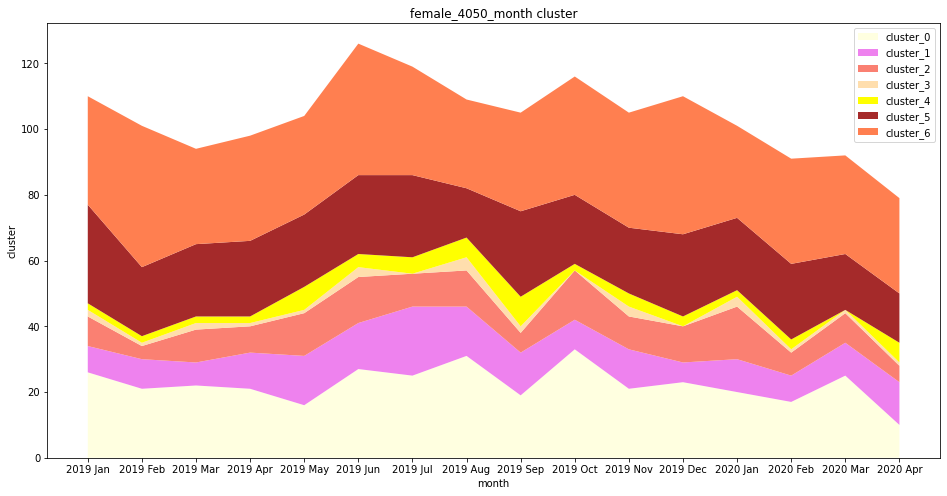

In [ ]:
#월에 해당 클러스터가 0개 일것을 감안하여 생성



#####################################################################
grouped = df_female_4050.groupby(['year','month','pred'])

arr_20 = [[0 for j in range(16)] for i in range (k)]


for key, group in grouped:
  if key[0]== 2019:
    arr_20[key[2]][key[1]-1] = len(group)
  elif key[0] == 2020:
    arr_20[key[2]][key[1]+11] = len(group)
for i in arr_20:        # a에서 안쪽 리스트를 꺼냄
    for j in i:    # 안쪽 리스트에서 요소를 하나씩 꺼냄
        print(j, end=' ')
    print()
  
x=["2019 Jan","2019 Feb","2019 Mar","2019 Apr","2019 May","2019 Jun",
   "2019 Jul","2019 Aug","2019 Sep","2019 Oct","2019 Nov","2019 Dec","2020 Jan","2020 Feb","2020 Mar","2020 Apr"]

#y = [[100, 140, 110, 150, 130, 160], [330, 450, 350, 450, 380, 480], [50, 50, 50, 50, 50, 50]]
#월별 클러스터 수의 합 


labels = ["cluster_{0}".format(i) for i in range(0,k)]
y = [arr_20[i] for i in range(0,k)]

plt.figure(figsize=(16,8))

#plt.stackplot(x, y,colors=['skyblue','aqua','lightcyan','palegreen','powderblue','royalblue','navy'],labels=labels)
plt.stackplot(x, y,colors=['lightyellow','violet','salmon','navajowhite','yellow','brown','coral'],labels=labels) #female
plt.xlabel('month')


plt.ylabel('cluster')
plt.title('female_4050_month cluster')
plt.legend()
 


plt.show()    

6 12 15 15 19 9 7 11 6 9 12 12 8 6 7 9 
4 2 8 7 7 5 10 6 7 6 10 7 9 8 5 7 
4 3 7 5 8 7 6 6 6 9 5 7 10 3 7 8 
0 0 0 1 3 0 0 0 0 0 1 1 0 1 0 0 
2 1 3 1 2 1 4 3 4 2 5 2 1 1 2 2 
0 0 0 1 2 0 0 0 0 0 0 0 1 0 0 0 
35 25 30 27 31 32 32 28 40 36 22 23 31 26 39 38 


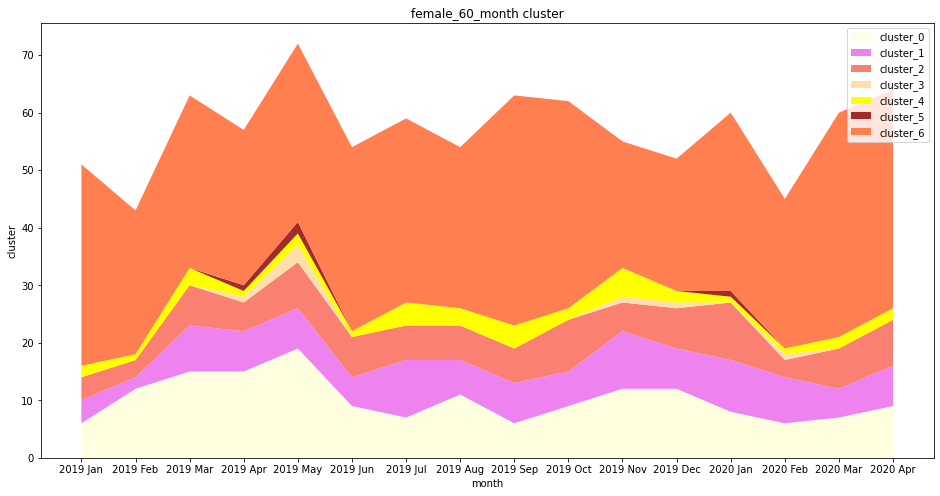

In [ ]:
#월에 해당 클러스터가 0개 일것을 감안하여 생성



#####################################################################
grouped = df_female_60.groupby(['year','month','pred'])

arr_20 = [[0 for j in range(16)] for i in range (k)]


for key, group in grouped:
  if key[0]== 2019:
    arr_20[key[2]][key[1]-1] = len(group)
  elif key[0] == 2020:
    arr_20[key[2]][key[1]+11] = len(group)
for i in arr_20:        # a에서 안쪽 리스트를 꺼냄
    for j in i:    # 안쪽 리스트에서 요소를 하나씩 꺼냄
        print(j, end=' ')
    print()
  
x=["2019 Jan","2019 Feb","2019 Mar","2019 Apr","2019 May","2019 Jun",
   "2019 Jul","2019 Aug","2019 Sep","2019 Oct","2019 Nov","2019 Dec","2020 Jan","2020 Feb","2020 Mar","2020 Apr"]

#y = [[100, 140, 110, 150, 130, 160], [330, 450, 350, 450, 380, 480], [50, 50, 50, 50, 50, 50]]
#월별 클러스터 수의 합 


labels = ["cluster_{0}".format(i) for i in range(0,k)]
y = [arr_20[i] for i in range(0,k)]

plt.figure(figsize=(16,8))

#plt.stackplot(x, y,colors=['skyblue','aqua','lightcyan','palegreen','powderblue','royalblue','navy'],labels=labels)
plt.stackplot(x, y,colors=['lightyellow','violet','salmon','navajowhite','yellow','brown','coral'],labels=labels) #female
plt.xlabel('month')


plt.ylabel('cluster')
plt.title('female_60_month cluster')
plt.legend()
 


plt.show()    